Prediciting Positions by Jake Cho, Nima Ghadessi, Shaam Madhvani

In [1]:
import pandas as pd
import numpy as np                        #import packages

newplayer="BBM_PlayerRankings.csv"             #assign file
newplayers=pd.read_csv(newplayer)              #read file

newplayers=newplayers[newplayers['g']>=61]             #Selecting players who played at least 61 games
newplayers=newplayers[newplayers['m/g']>=22]          #Selecting players who average at least 22 minutes a game
newplayers=newplayers[['Name','Pos','p/g','3/g','r/g','a/g','s/g','b/g','fg%','ft%','to/g']] 
                                                                           #Selecting desired columns
newplayers.set_index('Name',inplace=True)                     #Set index by Name
newplayers.reset_index(inplace=True)                          #Reset index

ActNewPos=np.asarray(newplayers['Pos'])          #create an array of values from the 'Pos' column of the dataframe

newplayers2=newplayers.drop(['Name','Pos'],axis=1)      #creates new dataframe without 'Name' and 'Pos' columns
newstats=np.asarray(newplayers2)                 #create an array of values from existing columns in dataframe
newplayers                           #display dataframe

,Name,Pos,p/g,3/g,r/g,a/g,s/g,b/g,fg%,ft%,to/g
0,Nikola Jokic,C,27.168831,1.285714,13.714286,7.779221,1.493506,0.883117,0.579826,0.811088,3.779221
1,Joel Embiid,C,30.450704,1.366197,11.746479,4.112676,1.070423,1.436620,0.499639,0.813620,3.154930
2,Stephen Curry,G,25.477612,4.417910,5.134328,6.238806,1.283582,0.343284,0.441732,0.914557,3.194030
3,Dejounte Murray,G,21.072464,1.405797,8.304348,9.159420,2.000000,0.347826,0.458730,0.797619,2.637681
4,Karl-Anthony Towns,C,24.115385,1.948718,9.782051,3.551282,0.961538,1.166667,0.529130,0.825820,3.102564
...,...,...,...,...,...,...,...,...,...,...,...
152,Avery Bradley,G,6.354839,1.322581,2.193548,0.758065,0.854839,0.145161,0.422857,0.888889,0.612903
153,Precious Achiuwa,F,9.210526,0.789474,6.434211,1.131579,0.513158,0.565789,0.443740,0.592593,1.171053
154,Nickeil Alexander-Walker,G,10.646154,1.615385,2.861538,2.400000,0.707692,0.353846,0.372059,0.743119,1.415385
155,Terrence Ross,F,9.984127,1.222222,2.555556,1.841270,0.444444,0.190476,0.397112,0.861538,1.190476


The above cell begins the data wrangling phase of one of our two datasets. We first establish this as the dataset of our new players (the ones playing in the current season). Our first two conditions filter the dataframe by a certain number of games played (61) and minutes played per game (22). We then filter the dataframe based on the columns we want to keep. The next part, in which we set the index and reset it, is merely a cosmetic phase so that the numbered index is reset from what it originally was. We then make an array of the values in the 'Pos' column, which lists each player's position played. This array will be used later in a Gaussian Naive Bayes model. Additionally, we drop the 'Name' and 'Pos' columns from the dataframe since we only want numerical values for our model. Following that, we make the dataframe into an array of values, which will also be used in the model. 

In [2]:
oldplayer="BBM_PlayerRankings old.csv"         #assign file
oldplayers=pd.read_csv(oldplayer)              #read file

oldplayers=oldplayers[oldplayers['g']>=61]           #Selecting players who played at least 61 games
oldplayers=oldplayers[oldplayers['m/g']>=22]            #Selecting players who average at least 22 minutes
oldplayers=oldplayers[['Name','Pos','p/g','3/g','r/g','a/g','s/g','b/g','fg%','ft%','to/g']]
                                                                  #Selecting desired columns
oldplayers.set_index('Name',inplace=True)              #Set index by Name
oldplayers.reset_index(inplace=True)                   #Reset index

oldplayers                             #display dataframe

,Name,Pos,p/g,3/g,r/g,a/g,s/g,b/g,fg%,ft%,to/g
0,Kevin Garnett,F,24.256098,0.134146,13.890244,4.987805,1.451220,2.170732,0.500000,0.791398,2.585366
1,Peja Stojakovic,F,24.246914,2.962963,6.271605,2.135802,1.333333,0.172840,0.480144,0.927059,1.888889
2,Dirk Nowitzki,F,21.818182,1.285714,8.701299,2.688312,1.194805,1.350649,0.461832,0.877069,1.753247
3,Shawn Marion,F,18.962025,1.139241,9.329114,2.708861,2.113924,1.316456,0.439970,0.850746,1.974684
4,Andrei Kirilenko,F,16.428571,0.870130,8.012987,3.142857,1.909091,2.779221,0.442748,0.792608,2.753247
...,...,...,...,...,...,...,...,...,...,...,...
133,Eric Williams,F,10.028169,0.492958,4.028169,1.690141,0.985915,0.126761,0.386288,0.759717,1.239437
134,Raja Bell,G,11.271605,0.765432,2.938272,1.320988,0.777778,0.160494,0.410000,0.786290,1.333333
135,Dale Davis,C,4.355263,0.000000,5.236842,0.947368,0.565789,0.815789,0.473310,0.613208,0.526316
136,Chucky Atkins,G,8.406250,1.265625,1.453125,3.484375,0.703125,0.031250,0.396694,0.752577,1.437500


The above cell continues the data wrangling process, but for the second dataframe. This dataframe looks at players from the 2003-2004 season. The first two steps involve creating the dataset. Following that, we filter by the same two conditions as above (at least 61 games played and 22 minutes per game played). We then filter the dataframe again by the columns we wish to keep. We then set the index by 'Name' and reset it so that the numbered index also resets. We then display the dataframe so we know if it is safe to continue the data wrangling.

In [3]:
ActOldPos=np.asarray(oldplayers['Pos']) #saving the columns of the old players' positions as an array
oldplayers2=oldplayers.drop(['Name','Pos'],axis=1) #saving only the numerical data of the players
oldstats=np.asarray(oldplayers2) #saving the players' stats as an array
ActOldPos

array(['F', 'F', 'F', 'F', 'F', 'G', 'G', 'F', 'F', 'G', 'F', 'G', 'C',
       'G', 'F', 'C', 'G', 'F', 'F', 'G', 'G', 'F', 'G', 'G', 'C', 'F',
       'F', 'F', 'G', 'C', 'G', 'G', 'F', 'G', 'F', 'G', 'G', 'F', 'G',
       'G', 'F', 'F', 'F', 'C', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'C',
       'C', 'F', 'F', 'F', 'G', 'G', 'G', 'F', 'G', 'G', 'G', 'F', 'C',
       'F', 'G', 'G', 'C', 'F', 'F', 'G', 'F', 'G', 'F', 'G', 'G', 'F',
       'G', 'F', 'C', 'F', 'C', 'F', 'F', 'G', 'C', 'G', 'C', 'C', 'F',
       'F', 'F', 'G', 'F', 'G', 'F', 'G', 'C', 'F', 'C', 'G', 'G', 'G',
       'G', 'C', 'F', 'F', 'G', 'C', 'F', 'C', 'F', 'C', 'F', 'C', 'C',
       'C', 'G', 'G', 'F', 'C', 'F', 'G', 'F', 'F', 'G', 'G', 'C', 'F',
       'G', 'F', 'C', 'F', 'G', 'C', 'G', 'C'], dtype=object)

In the cell above, we are creating an array of the positions for the older players and naming it ActOldPos. We are calling the column of the old players' positions and then converting them into an numpy array. This gives us the different levels of positions. Then, we are creating a tempoary dataframe called oldplayers2 that only contains their stats. We then take that dataframe, and convert in to a numpy array called oldstats.

In [4]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB() #creating our model
model.fit(newstats,ActNewPos) #fitting the model with the new players stats and their new positions 
PredOldPos=model.predict(oldstats)

In the cell above we are fitting the Gaussian Naive Bayes Classification function from sklearn. We are training the model with the statistics from the new players and the positions of the new players. Using the predict function, we are returning the predictions for the old players' positions using their own stats. We then save the predictions of the old players as PredOldPos.

73.18840579710145

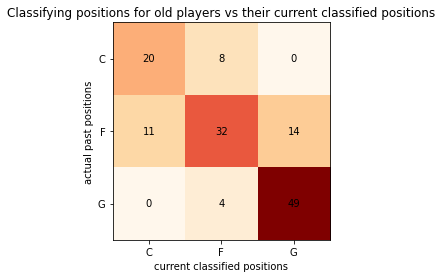

In [5]:
from sklearn.metrics import confusion_matrix #import confusion matrix 
import matplotlib.pyplot as plt #import plt
mat=confusion_matrix(ActOldPos, PredOldPos) #set matrix using our predicted positions for past players vs their actual positions
PosNames= ('C', 'F', 'G') #List of positions
fig, ax=plt.subplots() #setting subplots
ax.imshow(mat,cmap='OrRd') #setting color 
ax.set_title("Classifying positions for old players vs their current classified positions")
ax.set_xticks(np.arange(len(PosNames))) #Establish length of x axis
ax.set_yticks(np.arange(len(PosNames))) #Establish length of y axis
ax.set_xticklabels(PosNames) #Label each part of x axis
ax.set_yticklabels(PosNames) #Label each part of y axis
ax.set_ylabel("actual past positions") #Label Y axis
ax.set_xlabel("current classified positions") #label X axis

for i in range(len(mat)):
    for j in range (len(mat.T)):
        text=ax.text(j,i,mat[i,j],ha="center",va="center",color="k") #Using loops, label the confusion matrix
from sklearn.metrics import accuracy_score #import accuracy score
100*accuracy_score(ActOldPos,PredOldPos) #Find the accuracy score of predicted positions for past players vs their actual positions

With our confusion matrix, we want to see how our Gaussian Naive Bayes model would perform against the actual results for the old players. We expect some change over the past years, so it is expected to get value below 90%. The table shows that the total of 73% of the players were predicted correctly. 92% of the guards were predicted correctly, 71% of centers were predicted correctly, and only 57% of the forwards were predicted correctly. This is expected due to the nature of forward's versatility. 

76.43312101910828

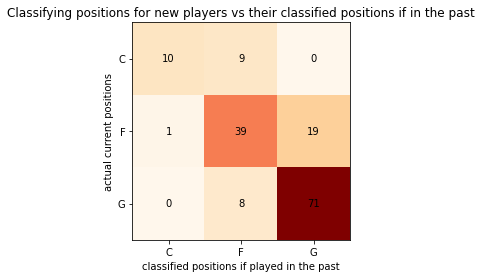

In [6]:
model2=GaussianNB()
model2.fit(oldstats,ActOldPos)   #Run a model with old players' stats
PredNewPos=model2.predict(newstats)   #Predict new players' positions with their stats 
mat2=confusion_matrix(ActNewPos, PredNewPos)   #Make a confusion matrix with their actual positions vs their predicted positions
PosNames= ('C', 'F', 'G')   #List of positions
fig, ax=plt.subplots()   #setting subplots
ax.imshow(mat2,cmap='OrRd')   #setting color 
ax.set_title("Classifying positions for new players vs their classified positions if in the past")
ax.set_xticks(np.arange(len(PosNames)))   #Establish length of x axis
ax.set_yticks(np.arange(len(PosNames)))   #Establish length of y axis
ax.set_xticklabels(PosNames)   #Label each part of x axis
ax.set_yticklabels(PosNames)   #Label each part of y axis
ax.set_ylabel("actual current positions")   #Label Y axis
ax.set_xlabel("classified positions if played in the past")   #label X axis

for i in range(len(mat2)):
    for j in range (len(mat2.T)):
        text=ax.text(j,i,mat2[i,j],ha="center",va="center",color="k")   #Using loops, label the confusion matrix
100*accuracy_score(ActNewPos,PredNewPos)   #Find the accuracy score of predicted positions for new players vs their actual positions

We want to test if it is easier to use older player's statistics to predict what the new player's role would be. With our confusion matrix, we want to see how our Gaussian Naive Bayes model would perform against the actual results for the new players. The table shows that the total of 76% of the players were predicted correctly. 90% of the guards were predicted correctly, 52% of centers were predicted correctly, and only 66% of the forwards were predicted correctly. The table shows overall slight improvement in accuracy, but this seems too small to consider it significant.